In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


file_path = '/content/Smart Mobility new.csv'
df = pd.read_csv(file_path)
df.head()


,Traffic_Light_State,Weather_Condition,Traffic_Condition,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h
0,Yellow,Clear,High,40.842.275.292.891.800,-7.370.314.869.323.040,205,4.989.343.479.610.330,8.265.277.992.850.860,0,-6.091.990.900.689.380,2,45,4.507.600.550.695.170,"195743365296003000,00%"
1,Green,Clear,High,408.311.193.987.152,-739.873.540.904.415,202,22.383.964.870.087.800,4.582.929.780.270.140,0,965.442.369.948.869,16,1,3.218.003.405.168.860,"538555351219373000,00%"
2,Green,Rain,High,4.081.954.876.392.320,-7.373.246.185.831.270,252,46.889.699.439.334.800,8.277.246.480.269.830,0,2.896.603.158.283.980,16,49,2.311.526.548.042.290,"1027747748641990000,00%"
3,Red,Fog,High,4.072.584.887.921.560,-7.398.013.411.315.870,37,573.053.642.288.215,3.769.556.743.980.880,0,-27.196.473.819.133.900,66,10,4.103.842.921.098.870,"2924327944996020000,00%"
4,Green,Clear,High,4.064.111.174.659.450,-7.382.509.533.565.380,125,9.150.745.620.777.420,7.279.990.343.468.820,0,-5.946.363.258.437.670,78,27,3.490.453.075.341.280,"2980584193833020000,00%"


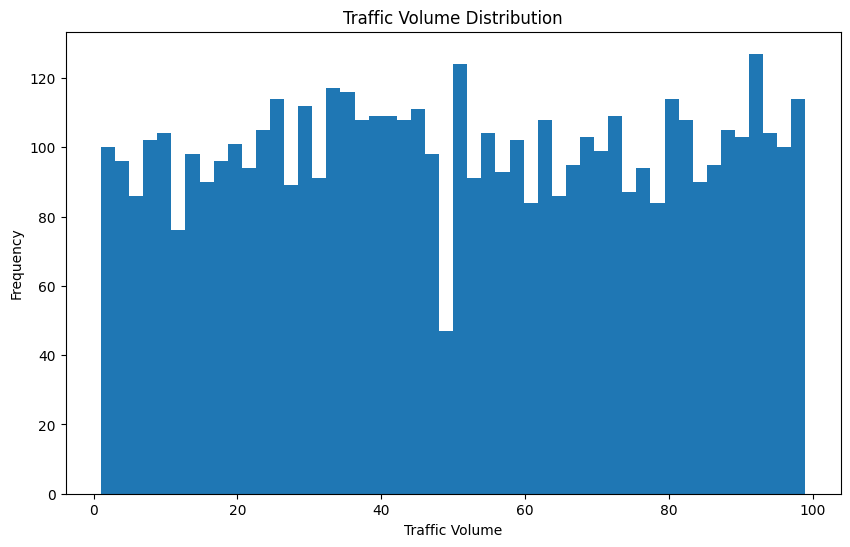

In [5]:
import matplotlib.pyplot as plt

df['Ride_Sharing_Demand'].plot(kind='hist', bins=50, figsize=(10,6))
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.show()


In [6]:

print(f"Shape of the dataset: {df.shape}")

print(f"Missing values in each column:\n{df.isnull().sum()}")

print(f"Statistical summary:\n{df.describe()}")


Shape of the dataset: (5000, 14)
Missing values in each column:
Traffic_Light_State       0
Weather_Condition         0
Traffic_Condition         0
Latitude                  0
Longitude                 0
Vehicle_Count             0
Traffic_Speed_kmh         0
Road_Occupancy_%          0
Accident_Report           0
Sentiment_Score           0
Ride_Sharing_Demand       0
Parking_Availability      0
Emission_Levels_g_km      0
Energy_Consumption_L_h    0
dtype: int64
Statistical summary:
       Vehicle_Count  Accident_Report  Ride_Sharing_Demand  \
count    5000.000000      5000.000000          5000.000000   
mean      153.921200         0.096000            50.487800   
std        83.523342         0.294621            28.484426   
min        10.000000         0.000000             1.000000   
25%        80.000000         0.000000            26.000000   
50%       156.000000         0.000000            50.000000   
75%       226.000000         0.000000            75.000000   
max       299.

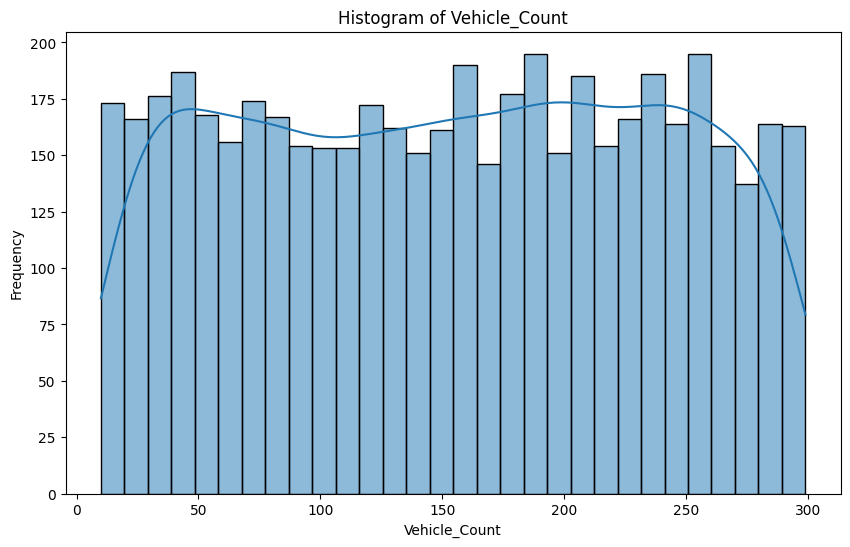

In [8]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicle_Count'], bins=30, kde=True)
plt.title('Histogram of Vehicle_Count')
plt.xlabel('Vehicle_Count')
plt.ylabel('Frequency')
plt.show()


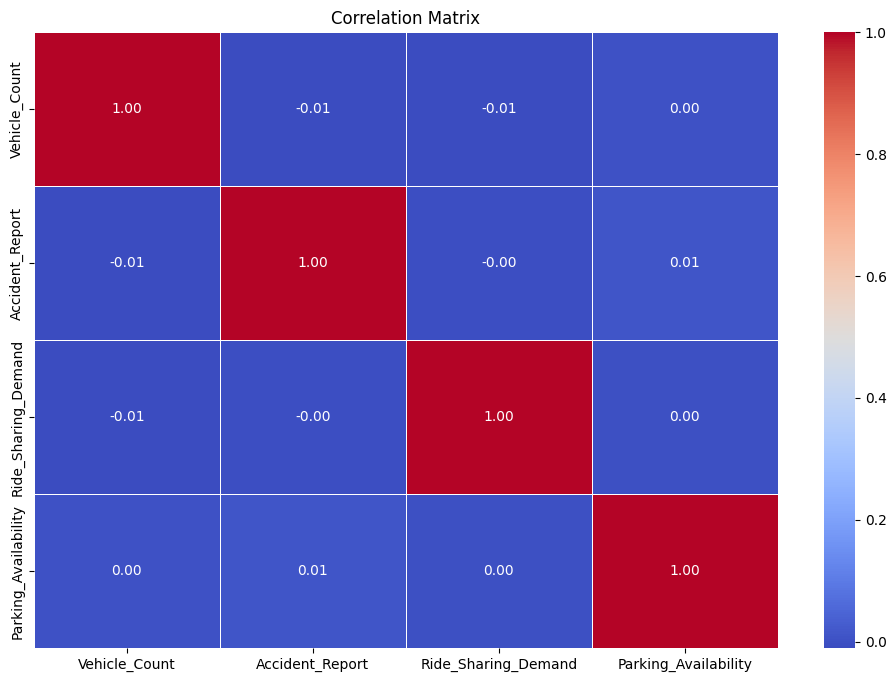

In [11]:

import numpy as np

df_numeric = df.select_dtypes(include=[np.number])


corr_matrix = df_numeric.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Mean Squared Error: 8932.986306652716
R2 Score: -0.3287852307396324


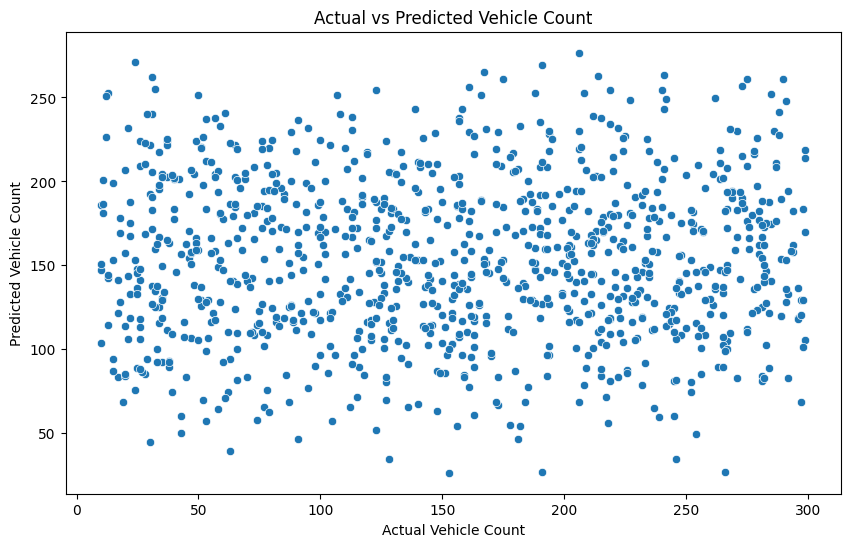

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



X = df_numeric.drop(columns=['Vehicle_Count'])
y = df_numeric['Vehicle_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Vehicle Count')
plt.xlabel('Actual Vehicle Count')
plt.ylabel('Predicted Vehicle Count')
plt.show()